

---


# **Task - 5 : Sales Prediction using Python**


---





---


**Importing necessary libraries**


---



In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



---


**Reading the csv file**

---



In [2]:
d = p.read_csv("Advertising.csv")



---


**Data Cleaning**

---



In [3]:
d.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
d.duplicated().sum()

0

In [5]:
d = d.dropna()



---


**EDA Analysis**

---



In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
d.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
d.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
d.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
d.shape

(200, 5)

In [11]:
d['TV'].value_counts().idxmin()

8.4

In [12]:
d['TV'].value_counts().idxmax()

199.8

In [13]:
d['Radio'].value_counts().idxmin()

2.9

In [14]:
d['Radio'].value_counts().idxmax()

4.1

In [15]:
d['Newspaper'].value_counts().idxmin()

79.2

In [16]:
d['Newspaper'].value_counts().idxmax()

9.3



---


**Data Visualization**


---



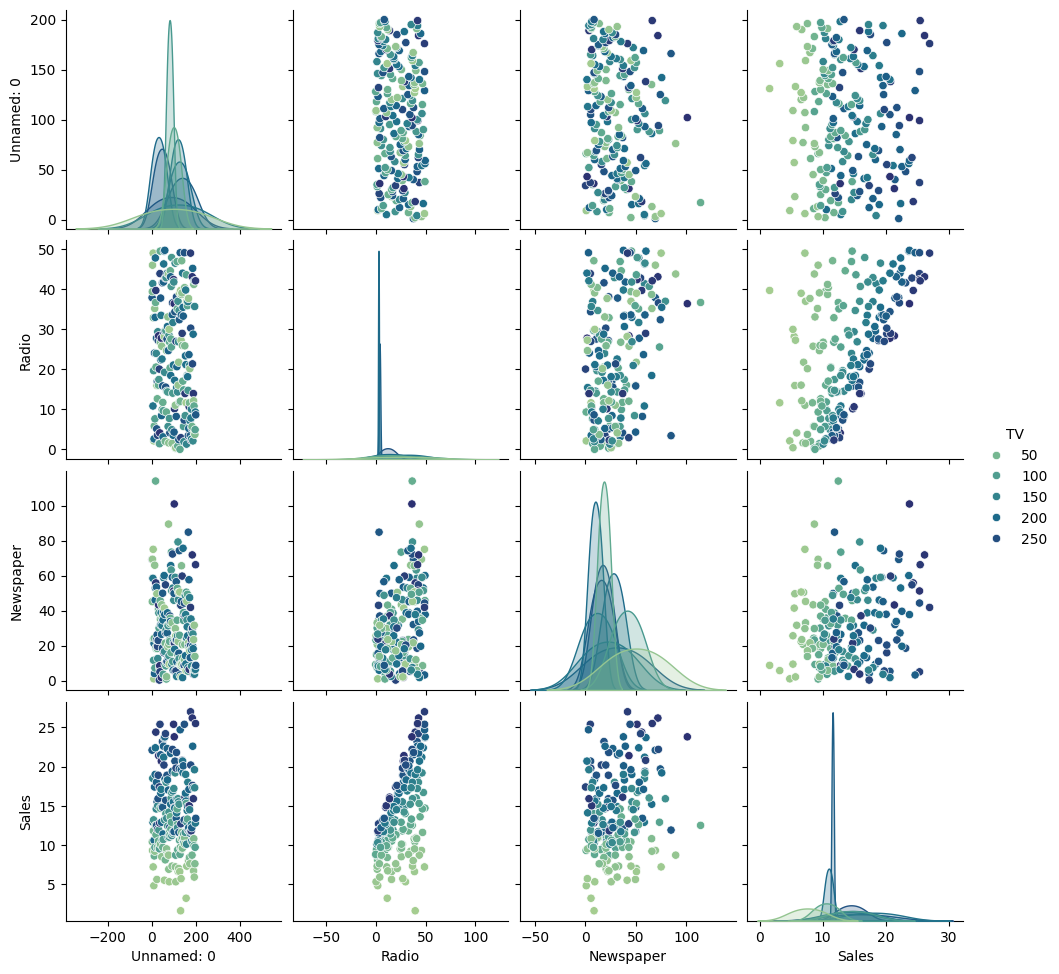

In [38]:
s.pairplot(d, palette = 'crest', hue = 'TV', height = 2.47)
m.show()

In [17]:
corr = d.corr()
print(corr)

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


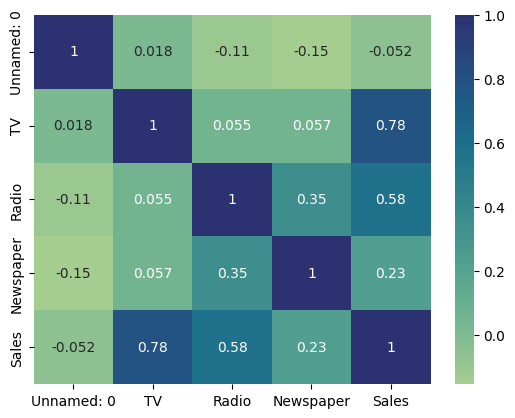

In [18]:
s.heatmap(corr, annot=True, cmap="crest")
m.show()

In [19]:
X = d.drop("Sales", axis=1)
y = d["Sales"]



---


**Spliting of the dataset into training and testing sets**

---



In [20]:
xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)



---


**Choosing a model and training (Linear Regression)**

---



In [21]:
mod = LinearRegression()
mod.fit(xtr, ytr)

LinearRegression()



---


**Making predictions**

---



In [22]:
y_pred = mod.predict(xts)



---


**Evaluating the model**

---




In [23]:
mse = mean_squared_error(yts, y_pred)
r2 = r2_score(yts, y_pred)
print("\nMean Squared Error: ", mse)
print("\nR-squared: ", r2)


Mean Squared Error:  3.1990044685889067

R-squared:  0.898648915141708




---


**Polynomial Feature Transformation**

---




In [24]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)



---


**Spliting of the dataset into training and testing sets**

---



In [25]:
xtrp, xtsp, ytr, yts = train_test_split(X_poly, y, test_size=0.2, random_state=42)



---


**Choosing a model and training (Polynomial Regression)**

---



In [26]:
model_poly = LinearRegression()
model_poly.fit(xtrp, ytr)

LinearRegression()



---


**Making predictions**

---



In [27]:
ypp = model_poly.predict(xtsp)



---


**Evaluating the model**

---




In [28]:
msep = mean_squared_error(yts, ypp)
r2_poly = r2_score(yts, ypp)
print("\nPolynomial Regression - Mean Squared Error: ", msep)
print("\nPolynomial Regression - R-squared: ", r2_poly)


Polynomial Regression - Mean Squared Error:  0.40940330642507006

Polynomial Regression - R-squared:  0.9870292556143082
